# Follow-Along Activity

/tmp/ipython-input-30501165.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2015-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


Train Accuracy: 0.53
Test Accuracy: 0.55


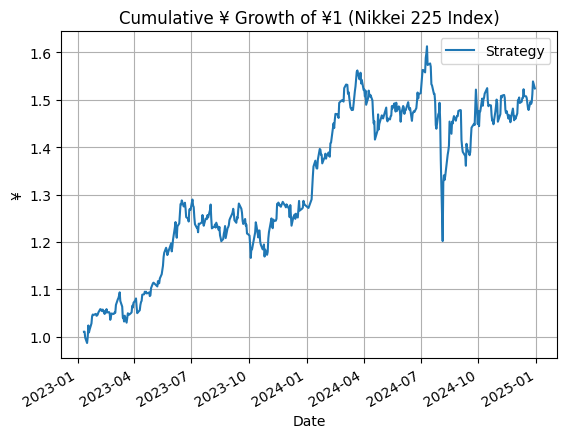

In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Step 2: Download historical stock data for Nikkei 225 Index
ticker = "^N225"
data = yf.download(ticker, start="2015-01-01", end="2024-12-31")
price_col = "Adj Close" if "Adj Close" in data.columns else "Close"
data = data[[price_col]].rename(columns={price_col: "price"})

# Step 3: Compute the Relative Strength Index (RSI)
def compute_rsi(series, window=14):
    delta = series.diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    avg_gain = gain.rolling(window).mean()
    avg_loss = loss.rolling(window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data["rsi"] = compute_rsi(data["price"])

# Step 4: Create target variable (1 if next day's return is positive, otherwise 0)
data["return"] = data["price"].pct_change()
data["target"] = (data["return"].shift(-1) > 0).astype(int)

# Step 5: Drop missing values
data = data.dropna()

# Step 6: Prepare features and labels
X = data[["rsi"]]
y = data["target"]

# Step 7: Split into training and testing sets (no shuffle to preserve time order)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 8: Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Train Accuracy:", round(train_score, 2))
print("Test Accuracy:", round(test_score, 2))

# Step 9: Simulate trading strategy
predictions = model.predict(X_test)
signals = pd.Series(predictions, index=X_test.index)

strategy_returns = data.loc[signals.index, "return"] * signals

# Plot cumulative returns
(1 + strategy_returns).cumprod().plot(label="Strategy")
plt.title("Cumulative ¥ Growth of ¥1 (Nikkei 225 Index)")
plt.legend()
plt.grid(True)
plt.ylabel("¥")

# Save to JPEG for textbook publication
plt.savefig("Figure 15.8 Cumulative Growth.jpeg", dpi=300, bbox_inches="tight")

plt.show()


# Your Project

In [2]:
def compute_macd(price, short=12, long=26):
    ema_short = price.ewm(span=short).mean()
    ema_long = price.ewm(span=long).mean()
    return ema_short - ema_long

data["macd"] = compute_macd(data["price"])


/tmp/ipython-input-2580369716.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2015-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


Train Accuracy: 0.53
Test Accuracy: 0.5


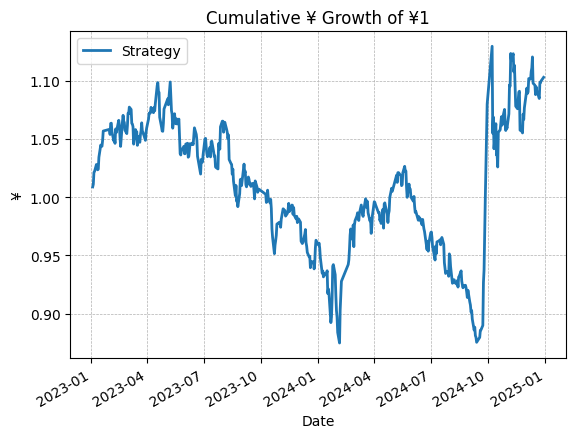

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Step 1: Download historical stock data for the Shanghai Composite Index
ticker = "000001.SS"
data = yf.download(ticker, start="2015-01-01", end="2024-12-31")
price_col = "Adj Close" if "Adj Close" in data.columns else "Close"
data = data[[price_col]].rename(columns={price_col: "price"})

# Step 2: Compute the Relative Strength Index (RSI)
def compute_rsi(series, window=14):
    delta = series.diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    avg_gain = gain.rolling(window).mean()
    avg_loss = loss.rolling(window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data["rsi"] = compute_rsi(data["price"])

# Step 3: Create target variable (1 if next day's return is positive, otherwise 0)
data["return"] = data["price"].pct_change()
data["target"] = (data["return"].shift(-1) > 0).astype(int)

# Step 4: Drop missing values
data = data.dropna()

# Step 5: Prepare features and labels
X = data[["rsi"]]
y = data["target"]

# Step 6: Split into training and testing sets (no shuffle to preserve time order)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 7: Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Train Accuracy:", round(train_score, 2))
print("Test Accuracy:", round(test_score, 2))

# Step 8: Simulate trading strategy
predictions = model.predict(X_test)
signals = pd.Series(predictions, index=X_test.index)

strategy_returns = data.loc[signals.index, "return"] * signals

(1 + strategy_returns).cumprod().plot(label="Strategy", linewidth=2)
plt.title("Cumulative ¥ Growth of ¥1")
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.ylabel("¥")

plt.show()
